In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [61]:
df[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


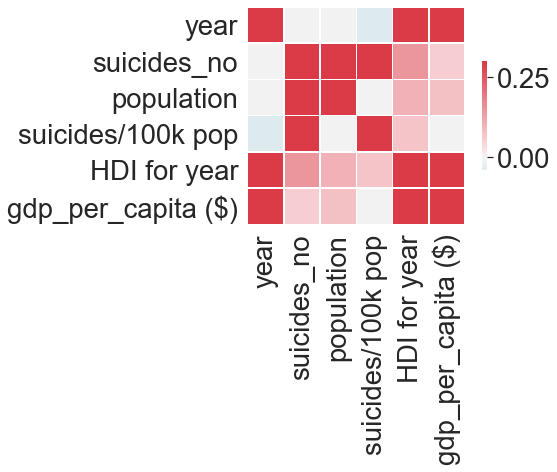

In [67]:
#relationship analysis
df_corr = df.drop(['population', 'suicides/100k pop', 'country-year', 'HDI for year', 'generation'], axis=1)
corel = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corel,vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

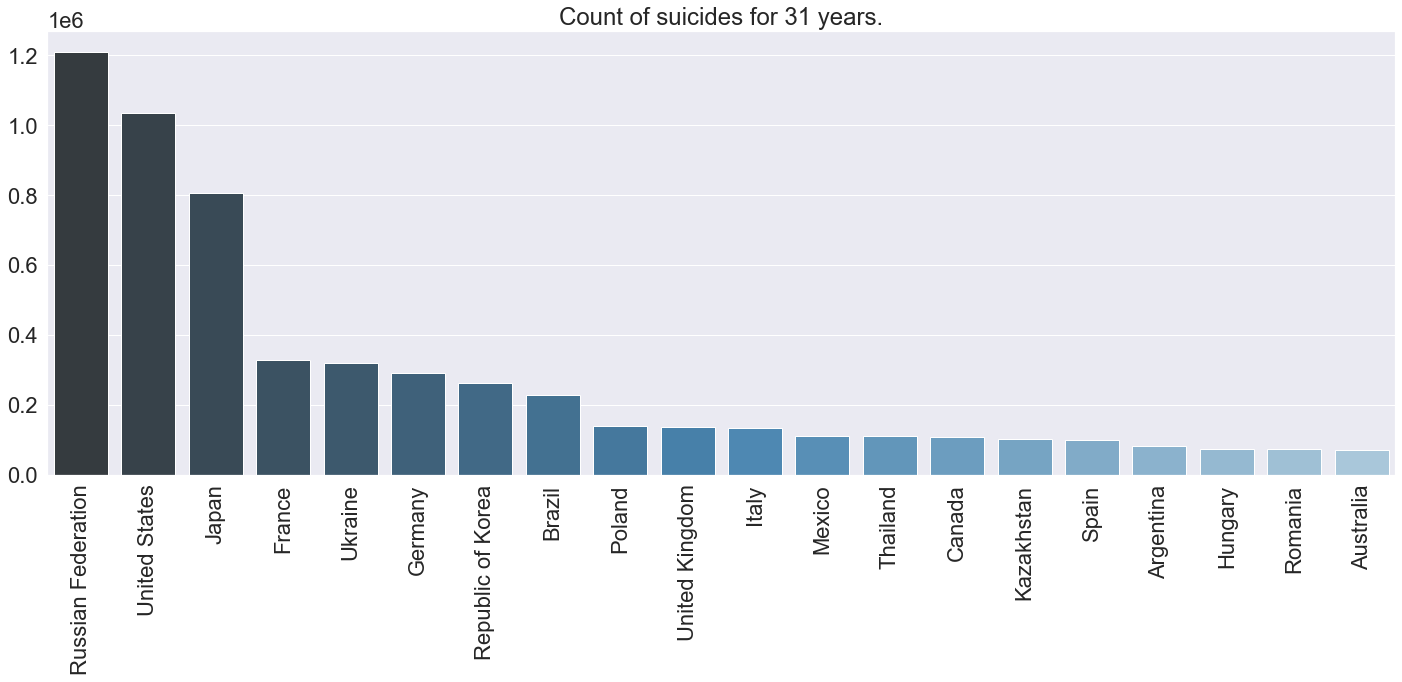

In [25]:
#df = df.drop(['country-year', 'HDI for year'], axis=1)

#Country suicide rating 
suic_sum = pd.DataFrame(df['suicides_no'].groupby(df['country']).sum())
suic_sum = suic_sum.reset_index().sort_values(by=['suicides_no'], ascending=False)
most_cont = suic_sum.head(20)
fig = plt.figure(figsize=(20,10))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='country',data=most_cont,palette="Blues_d")
plt.xticks(rotation=90)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

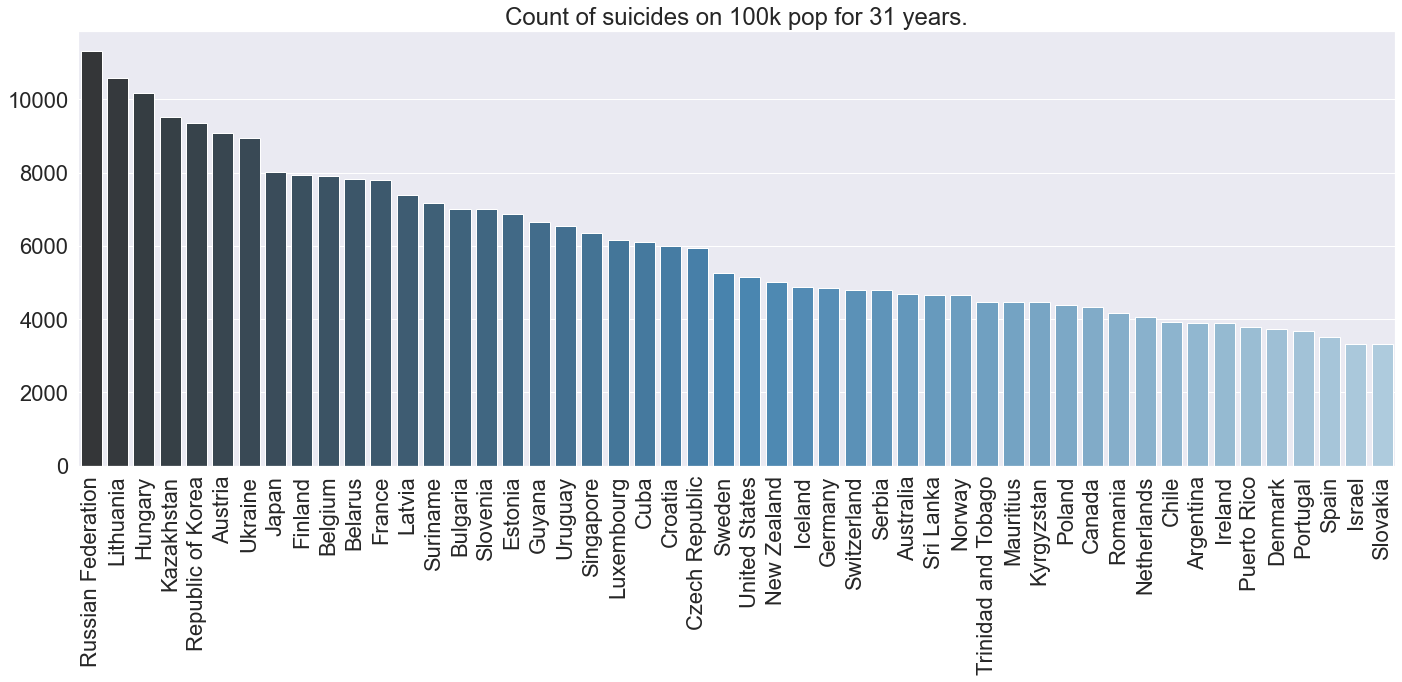

In [69]:
suic_sum = pd.DataFrame(df['suicides/100k pop'].groupby(df['country']).sum())
suic_sum = suic_sum.reset_index().sort_values(by=['suicides/100k pop'], ascending=False)
most_cont = suic_sum.head(50)
fig = plt.figure(figsize=(20,10))
plt.title('Count of suicides on 100k pop for 31 years.')
sns.set(font_scale=2)
sns.barplot(y='suicides/100k pop',x='country',data=most_cont,palette="Blues_d")
plt.xticks(rotation=90)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

In [31]:
df.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

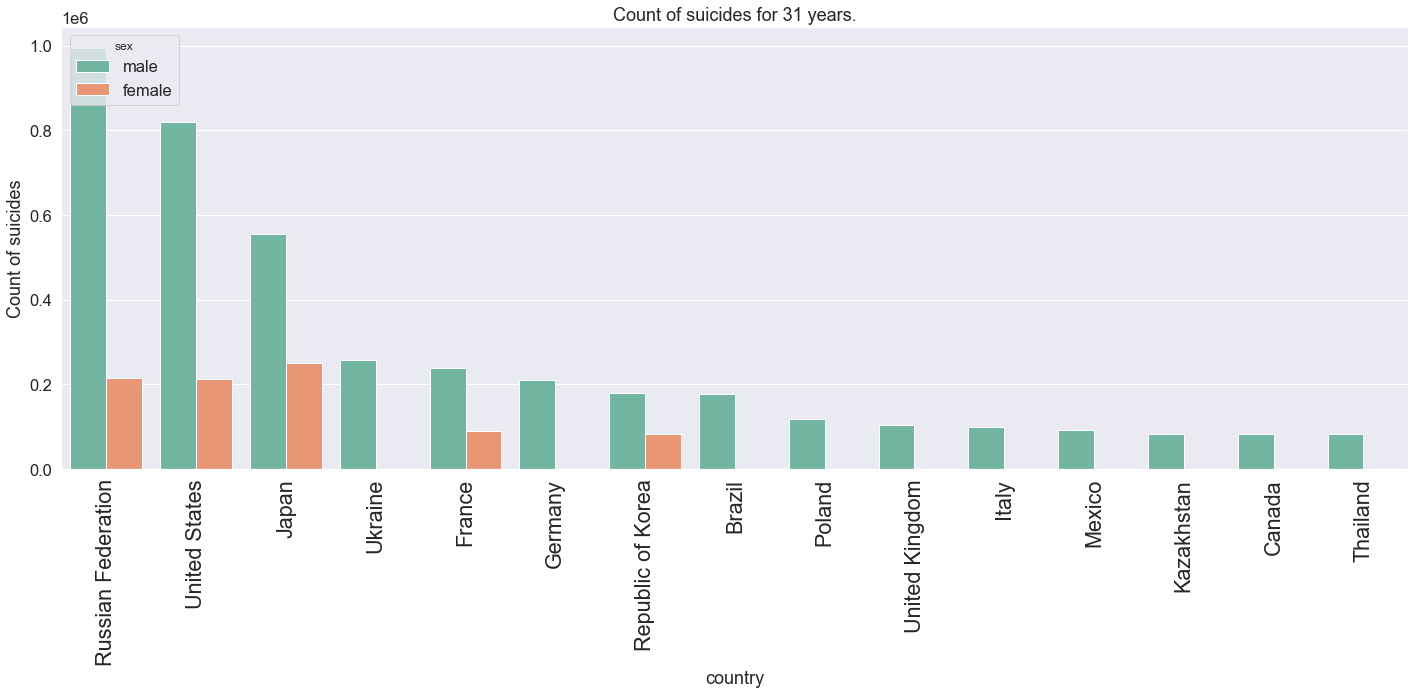

In [41]:
suic_sum_m = df['suicides_no'].groupby([df['country'],df['sex']]).sum()
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no',ascending=False)
most_cont_m = suic_sum_m.head(20)
most_cont_m.head(10)
fig = plt.figure(figsize=(20,10))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=1.5)
sns.barplot(y='suicides_no',x='country',hue='sex',data=most_cont_m,palette='Set2');
plt.ylabel('Count of suicides')
plt.xticks(rotation=90, fontsize='large')
plt.tight_layout()

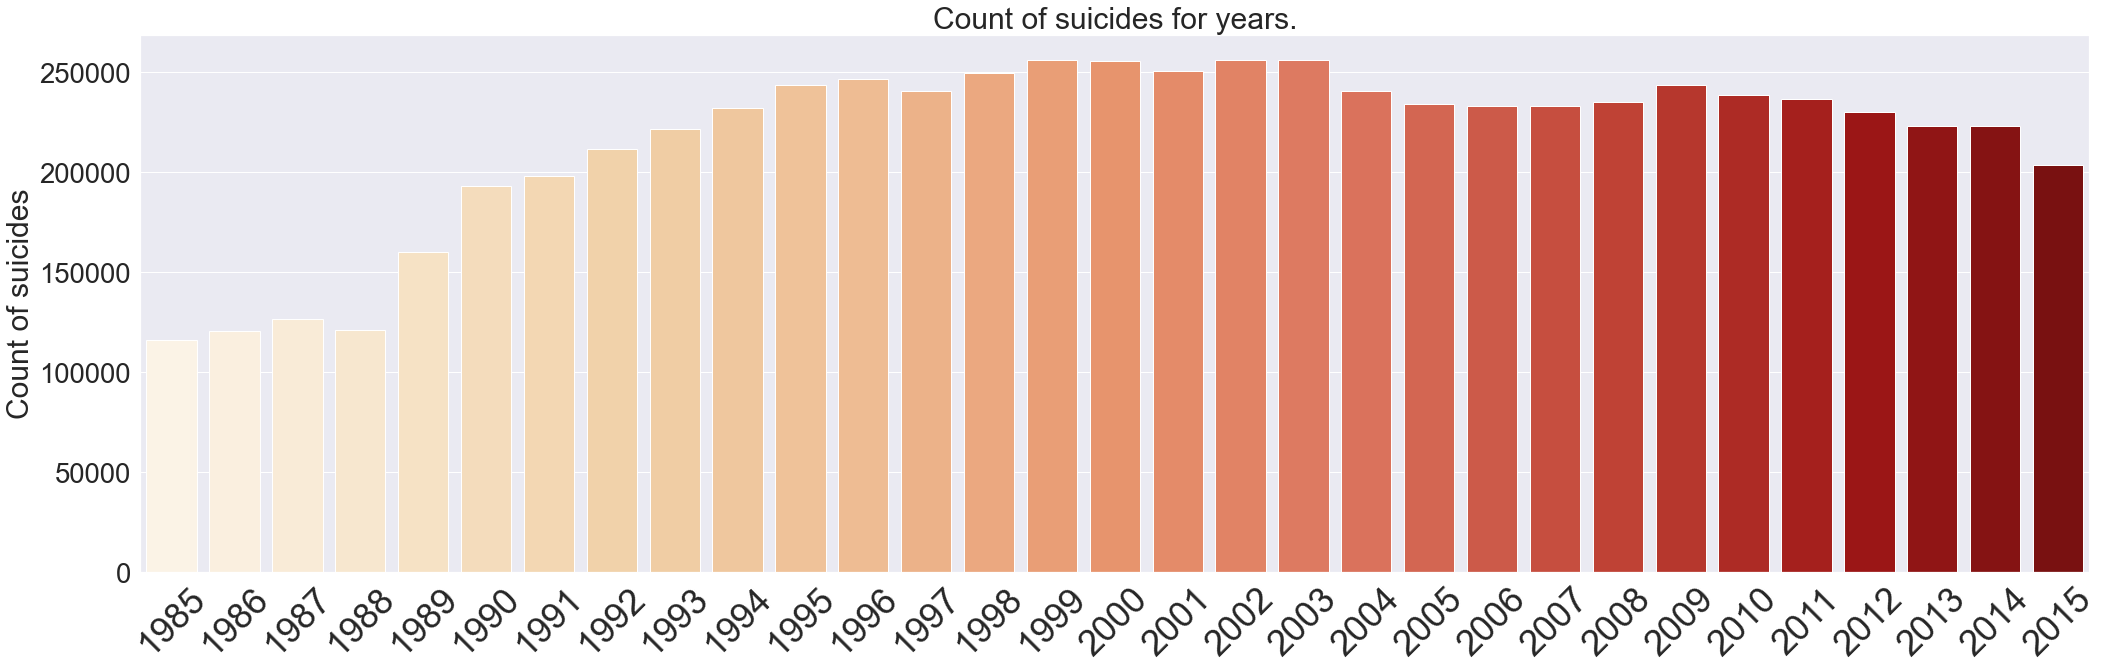

In [59]:
suic_sum_yr = pd.DataFrame(df['suicides_no'].groupby(df['year']).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_values(by='suicides_no',ascending=False)
most_cont_yr = suic_sum_yr.iloc[:-1, :]
fig = plt.figure(figsize=(30,10))
plt.title('Count of suicides for years.')
sns.set(font_scale=2.5)
sns.barplot(y='suicides_no',x='year',data=most_cont_yr,palette="OrRd");
plt.ylabel('Count of suicides')
plt.xlabel('')
plt.xticks(rotation=45, fontsize='large')
plt.tight_layout()

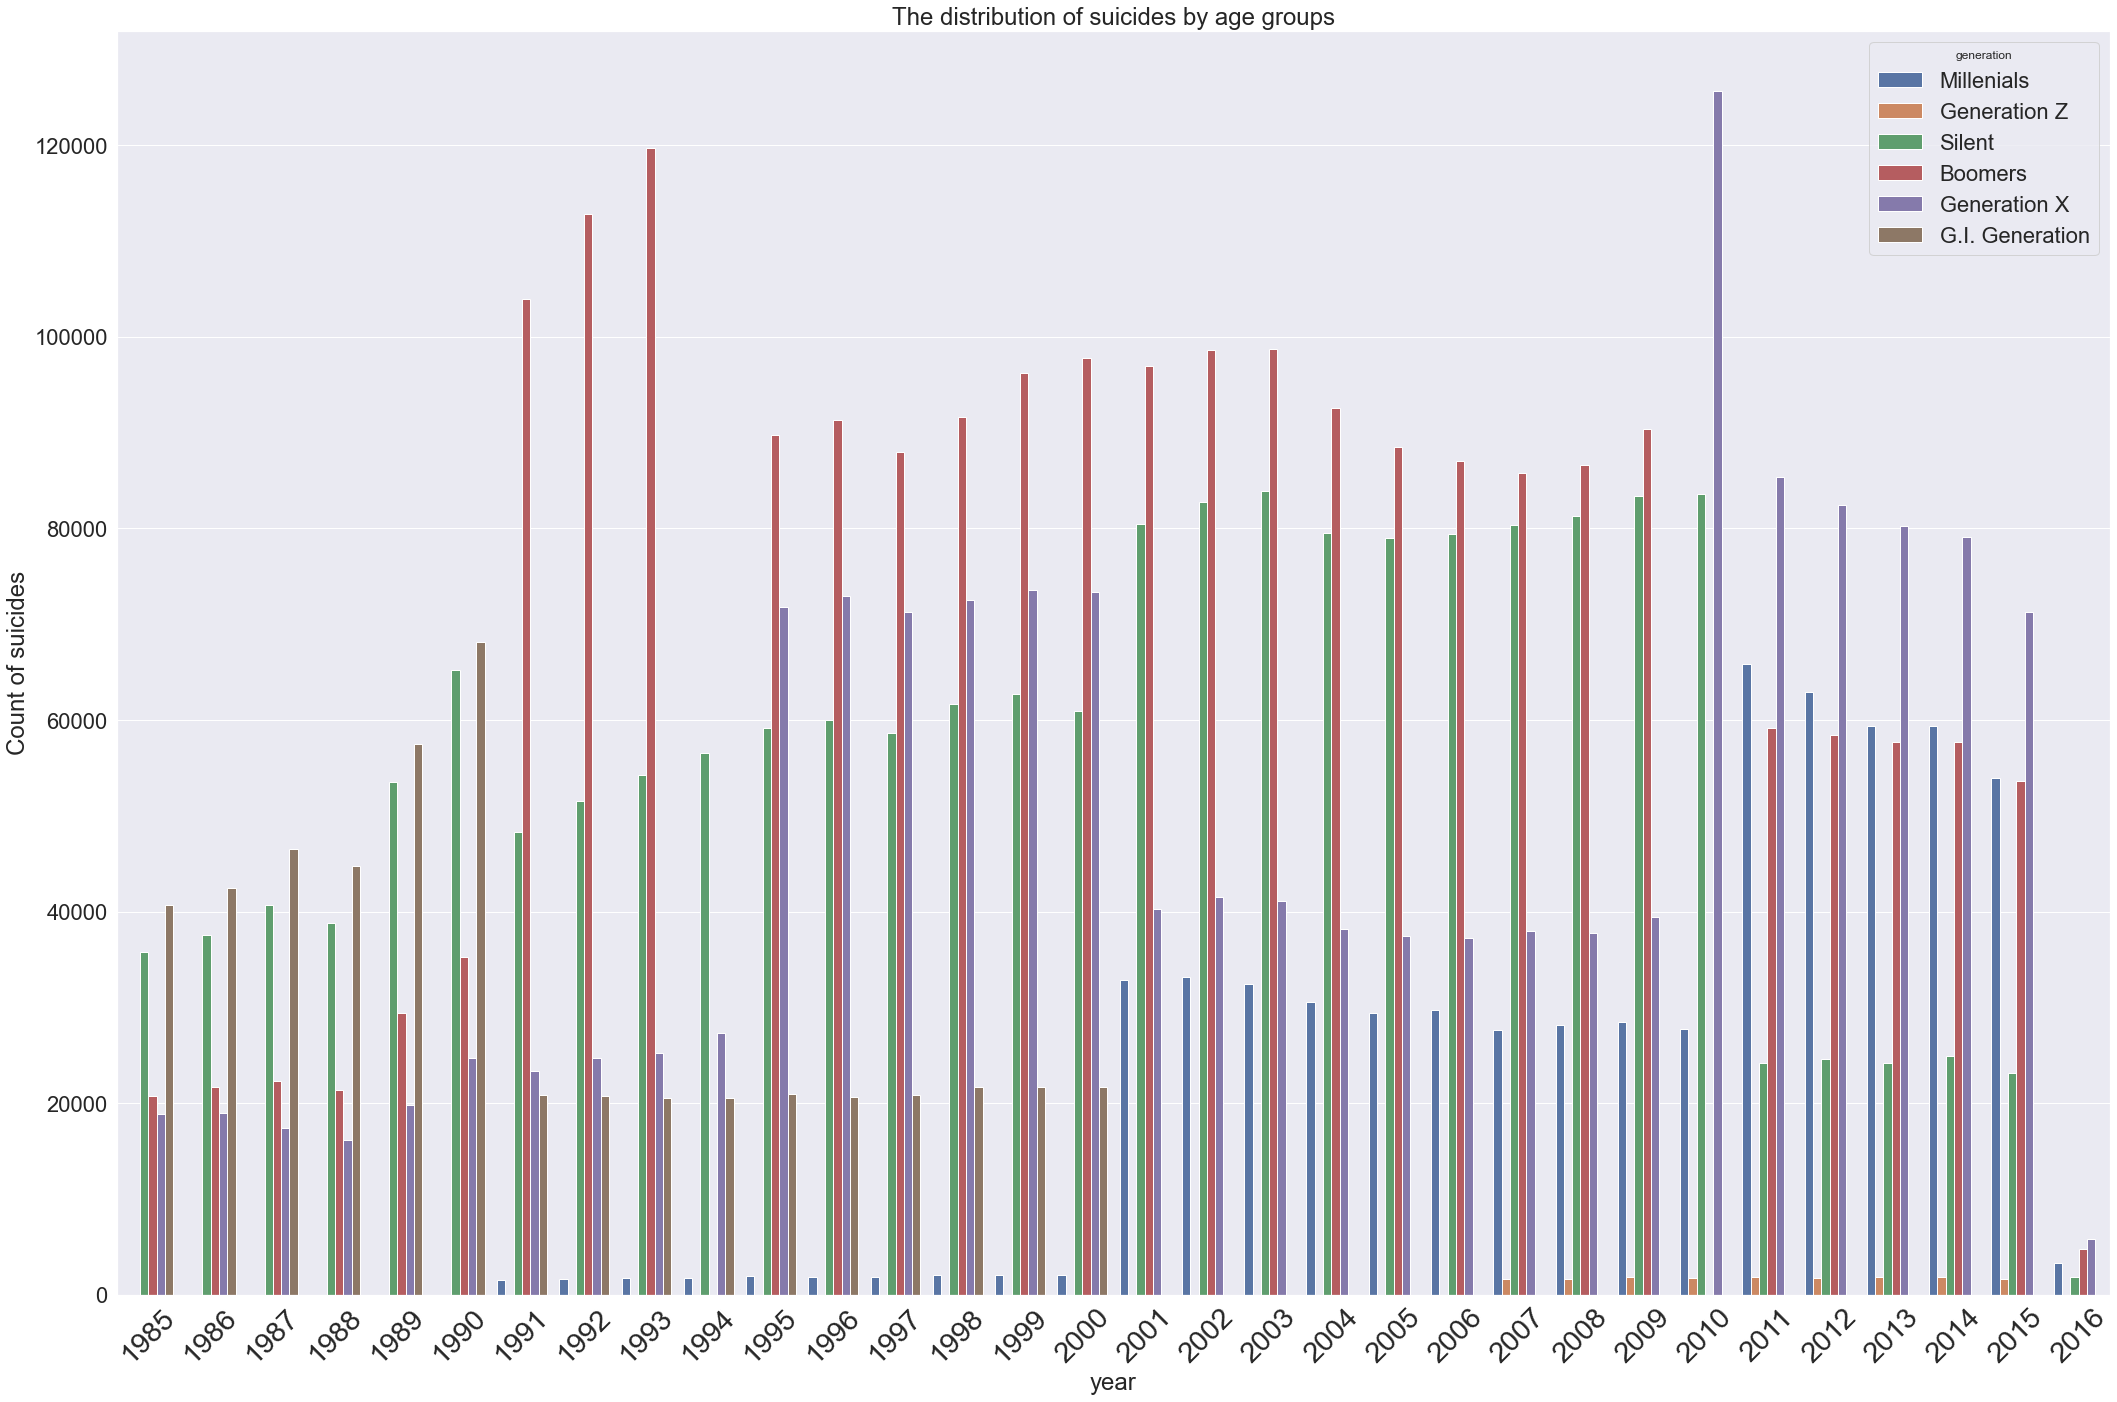

In [54]:
suic_sum_yr = pd.DataFrame(df['suicides_no'].groupby([df['generation'],df['year']]).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_values(by='suicides_no',ascending=True)
most_cont_yr = suic_sum_yr.iloc[:-1, :]
fig = plt.figure(figsize=(30,20))
plt.title('The distribution of suicides by age groups')

sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='year',hue='generation',data=most_cont_yr,palette='deep');
plt.ylabel('Count of suicides')
plt.xticks(rotation=45, fontsize='large')
plt.tight_layout()